# Computer Vision Masterclass - Object detection with YOLO

In [1]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable


## Object detection in images

### Downloading Darknet

In [2]:
ls

'Copy of Computer Vision Masterclass - Object detection with YOLO.ipynb'
 darknet/
 venv/


In [3]:
cd darknet/

/home/halmar/JNotebooks/YOLO/darknet


In [4]:
ls

3rdparty/               docker-compose.yml      predictions.jpg
backup/                 Dockerfile.cpu          README.md
build/                  Dockerfile.gpu          results/
build.ps1*              image_yolov3.sh*        scripts/
cfg/                    image_yolov4.sh*        src/
cmake/                  include/                vcpkg.json
CMakeLists.txt          json_mjpeg_streams.sh*  vcpkg.json.opencv23
darknet*                LICENSE                 video_yolov3.sh*
DarknetConfig.cmake.in  Makefile                video_yolov4.sh*
darknet_images.py       net_cam_v3.sh*          yolov4.weights
darknet.py              net_cam_v4.sh*          yolov4.weights.1
darknet_video.py        obj/
data/                   package.xml


### Compiling the library

In [5]:
!make

chmod +x *.sh


### Downloading YOLO weights

### Testing the object detector

In [6]:
ls

3rdparty/               docker-compose.yml      predictions.jpg
backup/                 Dockerfile.cpu          README.md
build/                  Dockerfile.gpu          results/
build.ps1*              image_yolov3.sh*        scripts/
cfg/                    image_yolov4.sh*        src/
cmake/                  include/                vcpkg.json
CMakeLists.txt          json_mjpeg_streams.sh*  vcpkg.json.opencv23
darknet*                LICENSE                 video_yolov3.sh*
DarknetConfig.cmake.in  Makefile                video_yolov4.sh*
darknet_images.py       net_cam_v3.sh*          yolov4.weights
darknet.py              net_cam_v4.sh*          yolov4.weights.1
darknet_video.py        obj/
data/                   package.xml


In [7]:
!./darknet detect cfg/yolov4.cfg yolov4.weights data/scream.jpg

 GPU isn't used 
 OpenCV isn't used - data augmentation will be slow 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   9 route  8 2 	                           ->  304 x 304 x 128 
  10 conv     64       1 x 1/ 1    304 x 304

In [8]:
import cv2
import matplotlib.pyplot as plt
def show_detection(path):
  image = cv2.imread(path)
  fig = plt.gcf()
  fig.set_size_inches(18,10)
  plt.axis('off')
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

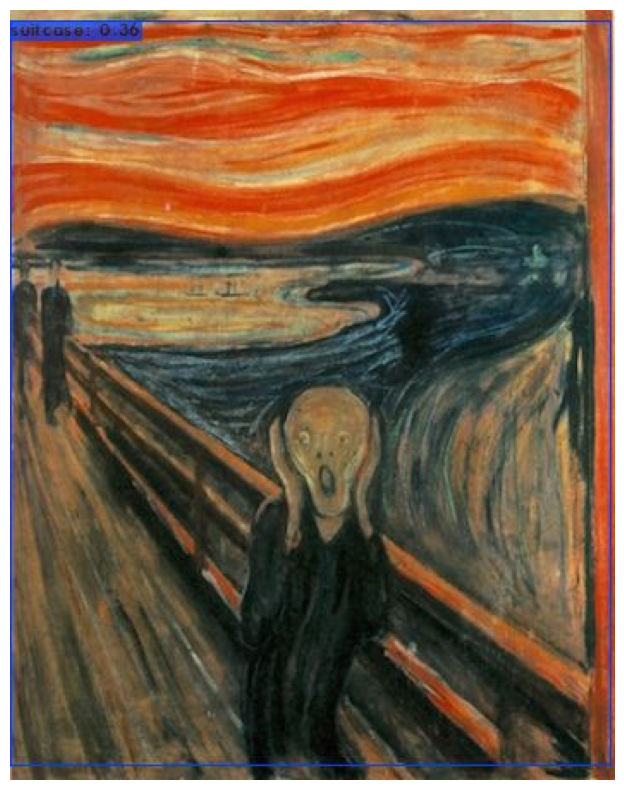

In [9]:
show_detection('predictions.jpg')

### Darknet and GPU

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

In [ ]:
ls

In [ ]:
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

In [ ]:
!make

In [ ]:
!./darknet detect cfg/yolov4.cfg yolov4.weights data/giraffe.jpg

In [ ]:
# Coco dataset: https://cocodataset.org/#home
show_detection('predictions.jpg')

### Threshold

In [ ]:
!./darknet detect cfg/yolov4.cfg yolov4.weights data/horses.jpg

In [ ]:
show_detection('predictions.jpg')

In [ ]:
!./darknet detect cfg/yolov4.cfg yolov4.weights data/horses.jpg -thresh 0.9

In [ ]:
show_detection('predictions.jpg')

In [ ]:
!./darknet detect cfg/yolov4.cfg yolov4.weights data/horses.jpg -thresh 0.98

In [ ]:
show_detection('predictions.jpg')

In [ ]:
!./darknet detect cfg/yolov4.cfg yolov4.weights data/horses.jpg -thresh 0.00001

In [ ]:
show_detection('predictions.jpg')

### ext_output

In [ ]:
!./darknet detect cfg/yolov4.cfg yolov4.weights data/horses.jpg -ext_output

In [ ]:
show_detection('predictions.jpg')

## Object detection in videos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
ls

In [ ]:
!./darknet detector demo cfg/coco.data cfg/yolov4.cfg yolov4.weights -dont_show /content/drive/MyDrive/Cursos\ -\ recursos/Computer\ Vision\ Masterclass/Videos/video_street.mp4 -i 0 -out_filename /content/drive/MyDrive/Cursos\ -\ recursos/Computer\ Vision\ Masterclass/Videos/video_street_result.avi

In [ ]:
!./darknet detector demo cfg/coco.data cfg/yolov4.cfg yolov4.weights -dont_show /content/drive/MyDrive/Cursos\ -\ recursos/Computer\ Vision\ Masterclass/Videos/video_people.mp4 -i 0 -out_filename /content/drive/MyDrive/Cursos\ -\ recursos/Computer\ Vision\ Masterclass/Videos/video_people_result.avi